In [1]:
from data_load import *
import matplotlib.pyplot as plt

In [2]:
from utils.file_load_save import *
from utils.data_processing import *
import os
import numpy as np
import glob

In [3]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    SMALL_SIZE = 24
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    return ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(9, 9, 3)


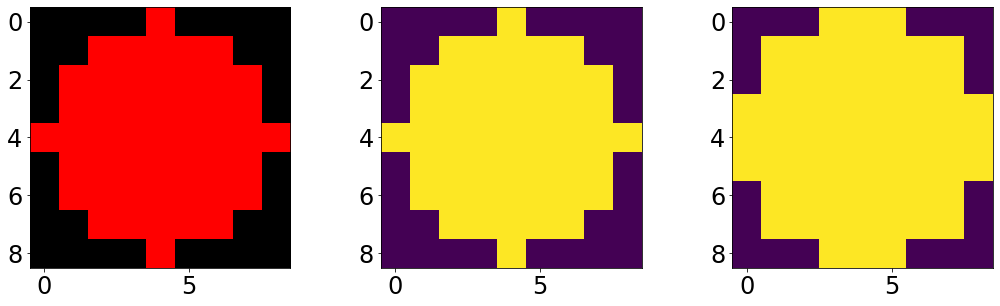

In [26]:
import cv2
# path = '/home/sh38/cell_counting/datasets/mrcnn/bacterial/cross-1/train/000/images/000.png'
# # Reading an image in default mode 
# image = cv2.imread(path) 
import numpy as np
# Radius of circle 
radius = 4
vis = np.zeros((radius*2+1, radius*2+1), np.float32)
vis = cv2.cvtColor(vis, cv2.COLOR_GRAY2BGR)
print(vis.shape)
image = vis
# Window name in which image is displayed 
window_name = 'Image'

# Center coordinates 
center_coordinates = (radius, radius) 
   
# Blue color in BGR 
color = (255, 0, 0) 
   
# Line thickness of 2 px 
thickness = -1
   
# Using cv2.circle() method 
# Draw a circle with blue line borders of thickness of 2 px 
image = cv2.circle(image, center_coordinates, radius, color, thickness) 
   
# Displaying the image  
# cv2.imshow(window_name, image)
ax = get_ax(1,3,5)
ax[0].imshow(image);ax[1].imshow(image[:,:,0]);ax[2].imshow(solid_cycle(4,4.3))

In [6]:
def solid_cycle(radius=3):
    cycle = np.zeros((2*radius+1,2*radius+1))
    xs, ys = [],[]
    for i in range(-radius, radius+1):
        for j in range(-radius,radius+1):
            if i**2+j**2<=radius**2:
                xs.append(i+radius); ys.append(j+radius)
    cycle[xs,ys]=1
    return cycle

In [23]:
def solid_cycle(radius=3, r =3.5):
    cycle = np.zeros((2*radius+1,2*radius+1))
    xs, ys = [],[]
    for i in range(-radius, radius+1):
        for j in range(-radius,radius+1):
            if i**2+j**2<=r**2:
                xs.append(i+radius); ys.append(j+radius)
    cycle[xs,ys]=1
    return cycle

In [4]:
docker = False
val_version=44
if val_version ==44:
    radius = 4
elif val_version ==45:
    radius = 8
elif val_version ==46:
    radius = 5
elif val_version ==47:
    radius = 3

cross_val = 1
normal_proc = False
dataset_root = '/data/datasets' if docker else '../datasets/'
train_data, test_data, train_truths, test_truths = load_train_data(val_version=val_version, cross_val = cross_val)

******** dataset partition summary ******
train:min-0-max-199, test:min-4-max-193
******** data loaded! ******


[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4. 5.]
[0. 1. 2.]
[0. 1. 2. 3. 4.]


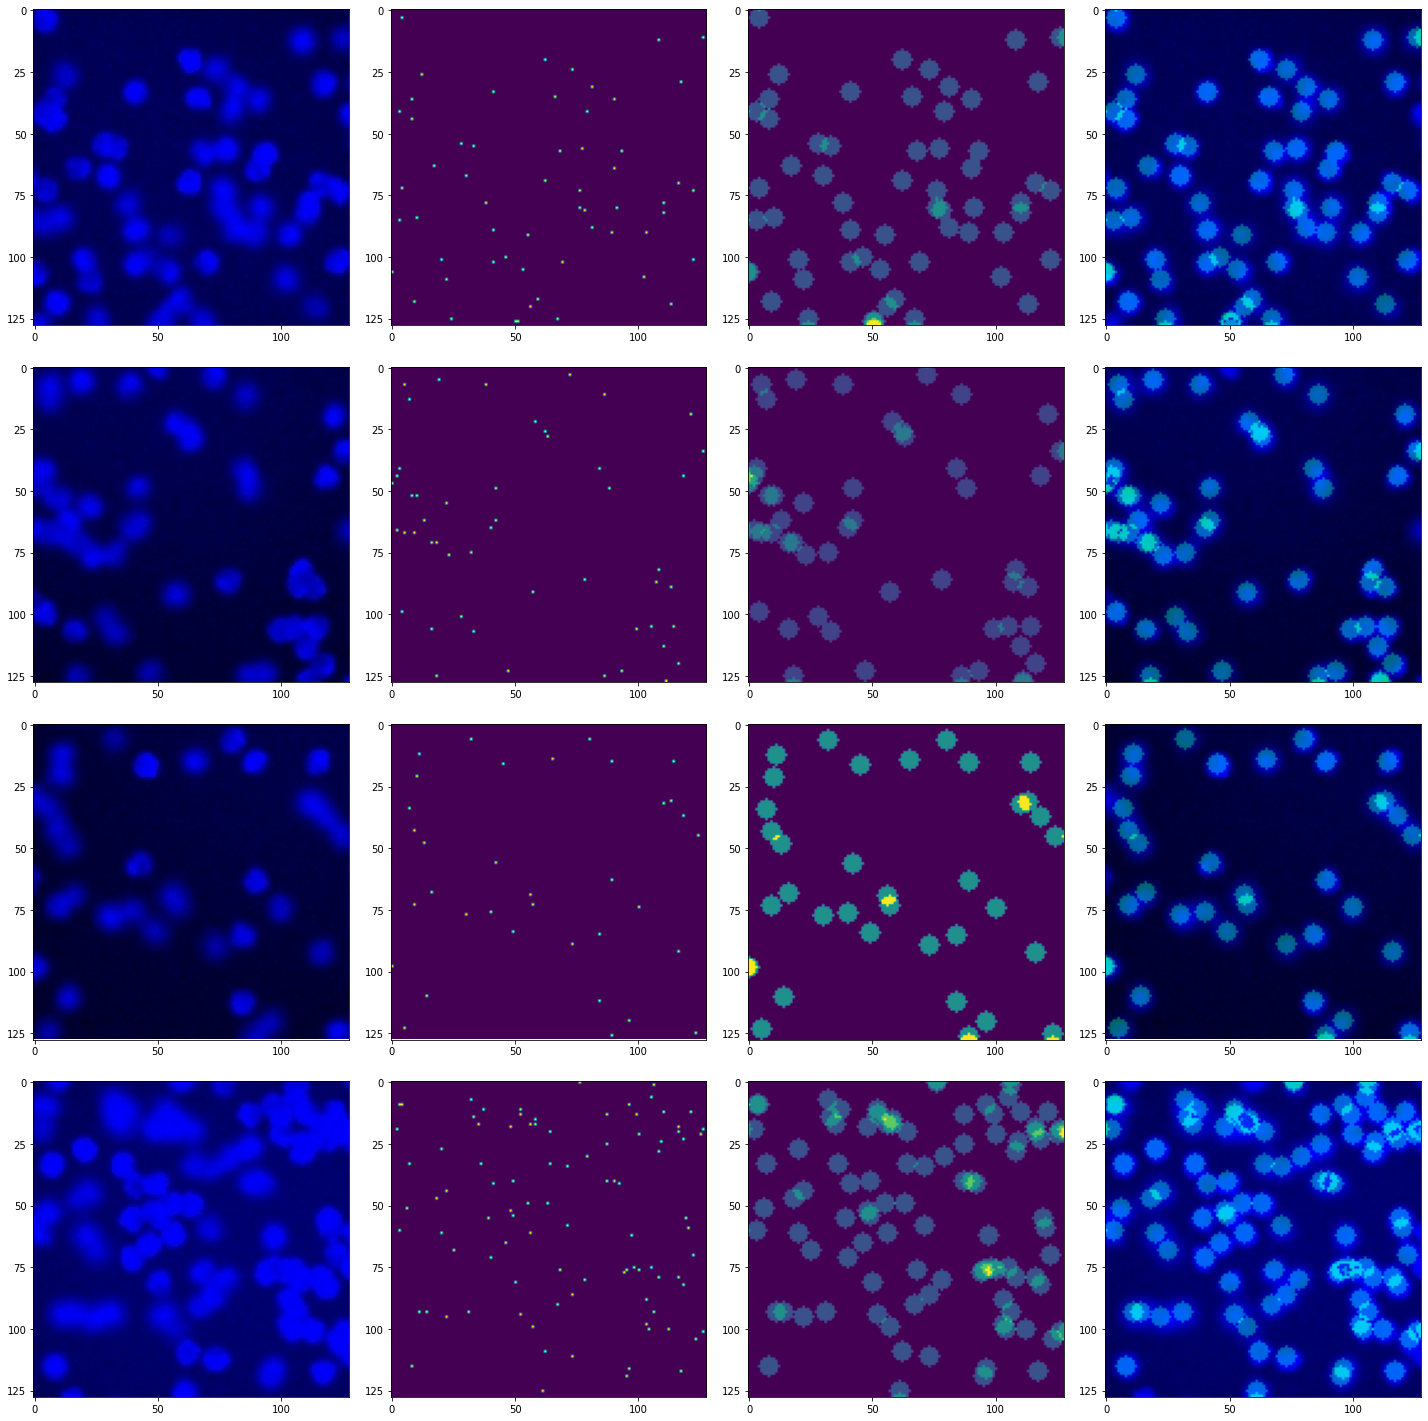

In [7]:
from scipy import signal
## plot an mask for all cell objects
nb_images = 4; factor = 100
indices = np.random.randint(0, train_data.shape[0], nb_images)
cycle_shape = solid_cycle(radius=radius)
ax = get_ax(rows = nb_images, cols = 4, size = 5)
dim = 64
for i in range(nb_images):
    index = indices[i]
    aax = ax[i,0]; bax = ax[i,1]; cax = ax[i,2]; dax=ax[i,3]
    image = train_data[index,:]; image=np.uint8((image-image.min())/(image.max()-image.min())*255)
    patch = image[128-dim:128+dim,128-dim:128+dim,:]
    dot_map = train_truths[index,:]; dot_patch = dot_map[128-dim:128+dim,128-dim:128+dim]
#     print(image.shape); print(dot_map.shape); print(cycle_shape.shape)
    cycle_map = signal.convolve2d(dot_patch, cycle_shape, boundary='symm', mode='same')
    print(np.unique(cycle_map))
#     print(cycle_map.shape)
    rgb_cycles = np.zeros(cycle_map.shape+(3,)); rgb_cycles[:,:,1]=cycle_map
#     rgb_patch = np.copy(patch); rgb_patch[:,:,1]=0
    mask_img = np.uint8(rgb_cycles*factor+patch); #mask_img = np.uint8(255*(mask_img-mask_img.min())/(mask_img.max()-mask_img.min()))
    aax.imshow(patch); bax.imshow(dot_patch); cax.imshow(np.uint8(cycle_map));dax.imshow(mask_img)

******** dataset partition summary ******
train:min-0-max-199, test:min-4-max-193
******** data loaded! ******
000
[0. 1.]
(256, 256)
0 0
000
[0. 1.]
(256, 256)
0 1
000
[0. 1.]
(256, 256)
0 2
000
[0. 1.]
(256, 256)
0 3
000
[0. 1.]
(256, 256)
1 0
000
[0. 1.]
(256, 256)
1 1
000
[0. 1.]
(256, 256)
1 2
000
[0. 1.]
(256, 256)
1 3
000
[0. 1.]
(256, 256)
2 0
000
[0. 1.]
(256, 256)
2 1
000
[0. 1.]
(256, 256)
2 2
000
[0. 1.]
(256, 256)
2 3
000
[0. 1.]
(256, 256)
3 0
000
[0. 1.]
(256, 256)
3 1
000
[0. 1.]
(256, 256)
3 2
000
[0. 1.]
(256, 256)
3 3
000
[0. 1.]
(256, 256)
4 0
000
[0. 1.]
(256, 256)
4 1
000
[0. 1.]
(256, 256)
4 2
000
[0. 1.]
(256, 256)
4 3
000
[0. 1.]
(256, 256)
5 0
000
[0. 1.]
(256, 256)
5 1
000
[0. 1.]
(256, 256)
5 2
000
[0. 1.]
(256, 256)
5 3
000
[0. 1.]
(256, 256)
6 0
000
[0. 1.]
(256, 256)
6 1
000
[0. 1.]
(256, 256)
6 2
000
[0. 1.]
(256, 256)
6 3
000
[0. 1.]
(256, 256)
7 0
000
[0. 1.]
(256, 256)
7 1
000
[0. 1.]
(256, 256)
7 2
000
[0. 1.]
(256, 256)
7 3
000
[0. 1.]
(256, 256)
8 

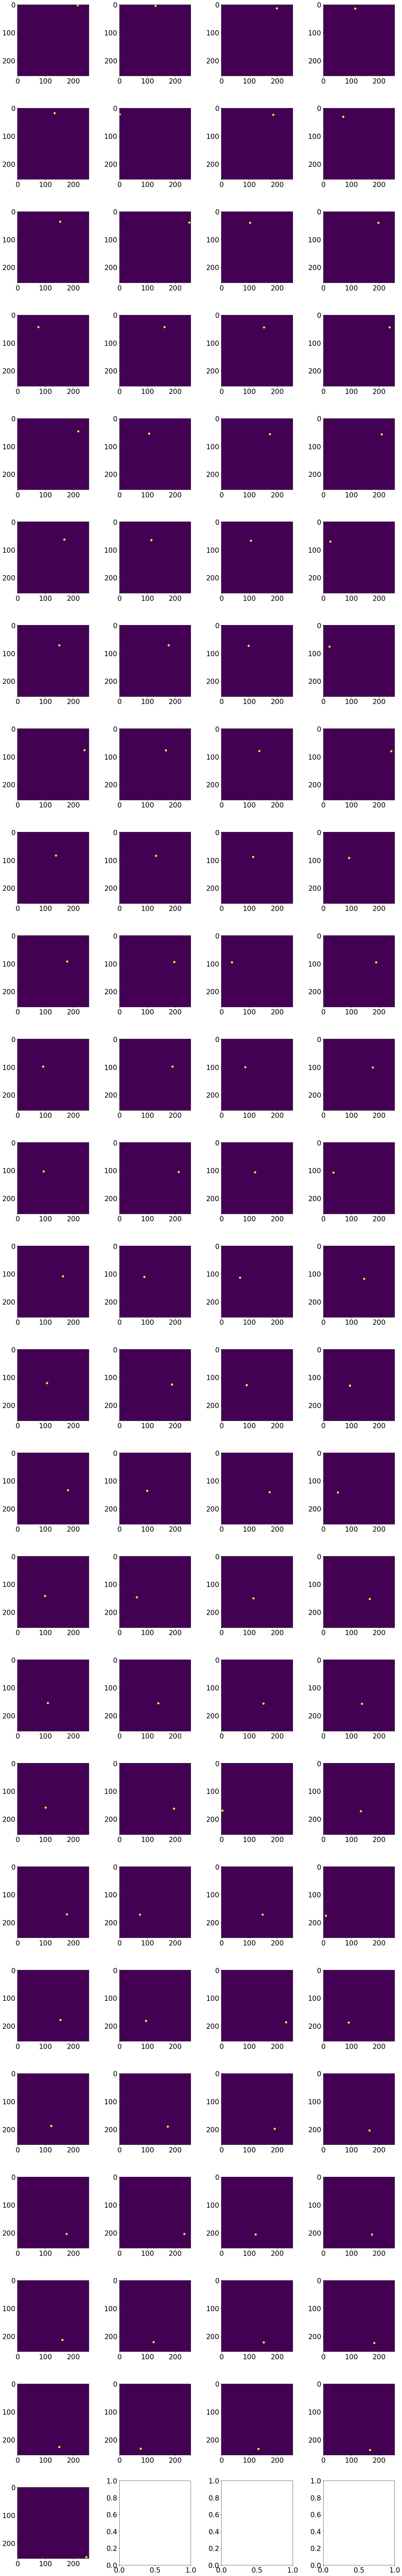

In [77]:
from data_load import *
from scipy import signal

## create folder 
def generate_folder(folder):
    if not os.path.exists(folder):
        os.system('mkdir -p {}'.format(folder))

## create a solid cycle shape
def solid_cycle(radius=3):
    cycle = np.zeros((2*radius+1,2*radius+1))
    xs, ys = [],[]
    for i in range(-radius, radius+1):
        for j in range(-radius,radius+1):
            if i**2+j**2<=radius**2:
                xs.append(i+radius); ys.append(j+radius)
    cycle[xs,ys]=1
    return cycle

docker = False
dataset_root = '/data/datasets' if docker else '../datasets/'

dataset = 'bacterial'

if dataset == 'bacterial':
    dataset_id = 44
    radius = 4
elif dataset == 'bone_marrow':
    dataset_id = 45
    radius = 8
elif dataset == 'colorectal':
    dataset_id == 46
    radius = 5
elif dataset == 'hESC':
    dataset_id == 47
    radius = 3

cycle_object = solid_cycle(radius)

cross = 1
X_train, X_test, Y_train, Y_test = load_train_data(val_version=dataset_id, cross_val = cross)


subset = 'train'

if subset == 'train':
	X, Y = X_train, Y_train
elif subset == 'test':
	X, Y = X_test, Y_test

cross_folder = 'cross-{}'.format(cross)
subset_folder = os.path.join(dataset_root, 'mrcnn', dataset, cross_folder, subset)
generate_folder(subset_folder)

index = 0
img_id = '{:03d}'.format(index)
data_folder = subset_folder+'/'+img_id
img_folder = data_folder+'/images'; mask_folder = data_folder+'/masks'
generate_folder(img_folder); generate_folder(mask_folder)
img = X[index,:,:,:].squeeze(); dot_map = Y[index,:,:].squeeze()
xs, ys = np.where(dot_map>0)
ax = get_ax(rows = int(len(xs)/4)+1, cols = 4,size = 5)
for i in range(len(xs)):
    xi, yi = xs[i], ys[i]
    mask = np.zeros(dot_map.shape,dtype = np.uint8)
    mask[xi,yi] = 1
    mask = signal.convolve2d(mask, cycle_object, boundary='fill', mode='same')
    print(img_id)
    print(np.unique(mask)); print(mask.shape)
    ri = i//4; ci = i%4; print(ri,ci)
    ax[ri,ci].imshow(mask)